In [128]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [129]:
df = pd.read_csv('Twitter_Data.csv')

In [130]:
#Conociendo la base de datos

In [131]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


<Axes: >

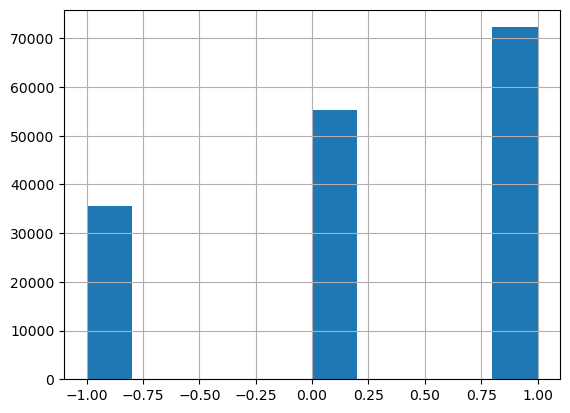

In [132]:
df['category'].hist()

In [133]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [134]:
#Limpiando la base de datos de los valores nulos o NaN

df = df.dropna()
df.isnull().sum()

clean_text    0
category      0
dtype: int64

<Axes: >

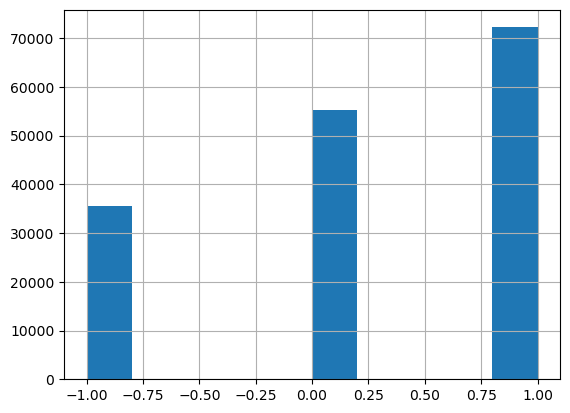

In [135]:
df['category'].hist()

In [136]:
target_map = {1: 1, -1: 0, 0: 2}
df['target'] = df['category'].map(target_map)

C:\Users\Julia\AppData\Local\Temp\ipykernel_26164\3935600485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['category'].map(target_map)


In [137]:
df

,clean_text,category,target
0,when modi promised “minimum government maximum...,-1.0,0
1,talk all the nonsense and continue all the dra...,0.0,2
2,what did just say vote for modi welcome bjp t...,1.0,1
3,asking his supporters prefix chowkidar their n...,1.0,1
4,answer who among these the most powerful world...,1.0,1
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,0
162976,dear rss terrorist payal gawar what about modi...,-1.0,0
162977,did you cover her interaction forum where she ...,0.0,2
162978,there big project came into india modi dream p...,0.0,2


In [138]:
df_train, df_test = train_test_split(df ,train_size=0.8, test_size=0.2)

In [157]:
df_train.head()

,clean_text,category,target
117718,election commission says narendra modi’ addres...,0.0,2
69813,demonitisation declared nobody was bothered wh...,-1.0,0
122502,nair had praised modi wednesday for the succes...,1.0,1
108735,tho honaai tha\nthere cant any other hero modi...,-1.0,0
15181,true respected modi sir citizen india our prim...,1.0,1


In [158]:
df_train

,clean_text,category,target
117718,election commission says narendra modi’ addres...,0.0,2
69813,demonitisation declared nobody was bothered wh...,-1.0,0
122502,nair had praised modi wednesday for the succes...,1.0,1
108735,tho honaai tha\nthere cant any other hero modi...,-1.0,0
15181,true respected modi sir citizen india our prim...,1.0,1
...,...,...,...
33608,does times now use mind rahul didnt lose 2014 ...,1.0,1
58561,india had developed the capability during govt...,1.0,1
32616,nda wins seats modi edapaddi will happy others...,1.0,1
100594,are you feeling happy about this incident just...,1.0,1


In [140]:
"""
TfidfVectorizer realiza el siguiente proceso:

Tokeniza y cuenta las palabras en cada documento.
Calcula la frecuencia de cada palabra en cada documento (TF).
Calcula la rareza de cada palabra en todos los documentos (IDF).
Multiplica TF por IDF para obtener el valor final de TF-IDF para cada palabra en cada documento.
"""

'\nTfidfVectorizer realiza el siguiente proceso:\n\nTokeniza y cuenta las palabras en cada documento.\nCalcula la frecuencia de cada palabra en cada documento (TF).\nCalcula la rareza de cada palabra en todos los documentos (IDF).\nMultiplica TF por IDF para obtener el valor final de TF-IDF para cada palabra en cada documento.\n'

In [141]:
vectorizer = TfidfVectorizer(max_features=2000)

In [142]:
X_train = vectorizer.fit_transform(df_train['clean_text'])

In [143]:
X_train

<130375x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1882491 stored elements in Compressed Sparse Row format>

In [144]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<32594x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 470232 stored elements in Compressed Sparse Row format>

In [159]:
Y_train = df_train['target']
Y_test = df_test['target']       # Codificar las etiquetas de prueba

In [160]:
#Entrenando el modelo y se itera 800 veces para obtener el mejor resultado
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, Y_train)
print('Train acc:', model.score(X_train, Y_train))
print('Test acc:', model.score(X_test, Y_test))

Train acc: 0.8963068072866731
Test acc: 0.89163649751488


In [161]:
#Predicciones del modelo para los datos de entrenamiento y de prueba
P_train = model.predict(X_train)
P_test = model.predict(X_test)
P_test

array([2, 1, 1, ..., 1, 2, 2], dtype=int64)

In [148]:
cm = confusion_matrix(Y_train, P_train,normalize='true')
cm

array([[0.75946383, 0.12148185, 0.11905432],
       [0.00825418, 0.9775441 , 0.01420172],
       [0.03672204, 0.06183853, 0.90143943]])

In [162]:
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

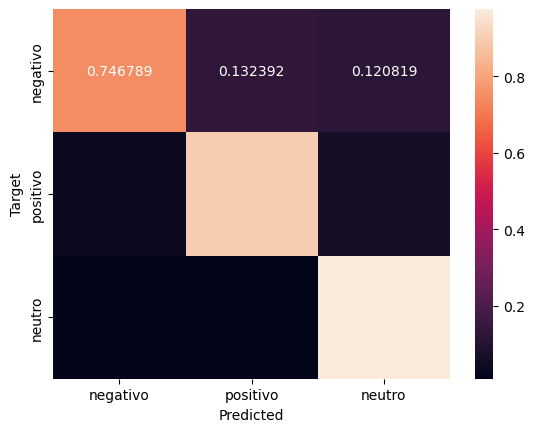

In [163]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [164]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'election': 567,
 'commission': 359,
 'says': 1534,
 'narendra': 1190,
 'modi': 1154,
 'address': 58,
 'the': 1755,
 'nation': 1192,
 'violate': 1871,
 'model': 1153,
 'code': 353,
 'conduct': 374,
 'time': 1788,
 'for': 674,
 'opposition': 1263,
 'declared': 465,
 'nobody': 1217,
 'was': 1897,
 'why': 1938,
 'face': 616,
 'not': 1226,
 'rbi': 1439,
 'chief': 324,
 'finance': 655,
 'ministry': 1139,
 'now': 1232,
 'all': 79,
 'crying': 438,
 'drdo': 534,
 'isro': 906,
 'who': 1933,
 'had': 767,
 'wednesday': 1912,
 'successful': 1689,
 'launch': 994,
 'asat': 139,
 'missile': 1145,
 'tha': 1749,
 'there': 1761,
 'cant': 286,
 'any': 114,
 'other': 1267,
 'hero': 811,
 'modis': 1156,
 'world': 1963,
 'true': 1814,
 'respected': 1484,
 'sir': 1613,
 'citizen': 340,
 'india': 875,
 'our': 1270,
 'prime': 1371,
 'responsibility': 1486,
 'caste': 299,
 'vote': 1881,
 'new': 1209,
 'asked': 142,
 'family': 630,
 'work': 1958,
 'place': 1318,
 'large': 988,
 'jai': 912,
 'hind': 821,
 'more'

In [165]:
corte = 4
print('palabras mas positivas')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

palabras mas positivas
more -4.307476976848877
many -4.8809412192609765
great -5.3841729629738015
successfully -4.02700534880916
proud -5.097345009121352
own -4.502046725618341
best -7.044155322843627
lol -4.4397120915905735


In [183]:
prueba = ['i hate you', 'hello how are you', 'i am so bad','i am so happy bro', 'me siento triste','ando muy enojado','I am very angry']
x = vectorizer.transform(prueba)


In [184]:
P = model.predict(x)
P

array([0, 2, 0, 1, 2, 2, 1], dtype=int64)

In [185]:
clases = model.classes_
clases

array([0, 1, 2], dtype=int64)

In [186]:
for i in range(len(prueba)):
    if clases[P[i]] == 0:
        print(f"el comentario: '{prueba[i]}' es negativo")
    elif clases[P[i]] == 1:
        print(f"el comentario: '{prueba[i]}' es positivo")
    else:
        print(f"el comentario: '{prueba[i]}' es neutro")
        

el comentario: 'i hate you' es negativo
el comentario: 'hello how are you' es neutro
el comentario: 'i am so bad' es negativo
el comentario: 'i am so happy bro' es positivo
el comentario: 'me siento triste' es neutro
el comentario: 'ando muy enojado' es neutro
el comentario: 'I am very angry' es positivo
